# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [453]:
import pandas as pd
import numpy as np

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [454]:
df = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx', na_values=["NaN", "Unknown", "UNKNOWN", "unknown", "no name", "NO NAME", "Dog Name Not Provided"]) 
df.columns = df.columns.str.replace(' ','_')
df.head(5)

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [456]:
# We have 81,937 rows
df.shape

(81937, 15)

In [457]:
df.dtypes

Owner_Zip_Code                     int64
Animal_Name                       object
Animal_Gender                     object
Primary_Breed                     object
Secondary_Breed                   object
Animal_Dominant_Color             object
Animal_Secondary_Color            object
Animal_Third_Color                object
Animal_Birth              datetime64[ns]
Spayed_or_Neut                    object
Guard_or_Trained                  object
Vaccinated                        object
Application_Date          datetime64[ns]
License_Issued_Date       datetime64[ns]
License_Expired_Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [161]:
# Each row is a dog in NYC
# 'Vaccinated' is wheather the dog is vaccinated or not
# 'Animal_Dominant_Color'is the predominant color even if there are others

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [162]:
# What are the most common breeds for male vs female dogs
# How many dog licenses have already expired
# What is the most common name for a dog
# Are dogs usually spayed

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [458]:
# There were 12894 dogs whose breeds were unknown
# Unknown values are now excluded by default after equal them to na_values
df.Primary_Breed.str.lower().value_counts().head(10)

yorkshire terrier                       5133
shih tzu                                4727
chihuahua                               3924
maltese                                 2965
labrador retriever                      2872
american pit bull terrier/pit bull      2153
american pit bull mix / pit bull mix    2029
labrador retriever crossbreed           1864
beagle                                  1438
pomeranian                              1422
Name: Primary_Breed, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [333]:
# already done above

## What are the most popular dog names?

In [334]:
df.Animal_Name.str.lower().value_counts().head(10)

bella      667
max        652
charlie    499
lola       468
rocky      444
coco       444
lucy       406
buddy      379
lucky      372
daisy      359
Name: Animal_Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [459]:
# Not a single dog has my name
df["Animal_Name"] = df["Animal_Name"].str.lower()
df[df.Animal_Name == 'patricia']

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date


In [460]:
# 652 dogs are called Max
dogs_max = df[df.Animal_Name == 'max']
dogs_max.shape

(652, 15)

In [461]:
# 37 dogs are called Maxwell
dogs_maxwell = df[df.Animal_Name == 'maxwell']
dogs_maxwell.shape

(37, 15)

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [462]:
# only 0.1 %
df['Guard_or_Trained'].value_counts(normalize=True) * 100

No     99.897128
Yes     0.102872
Name: Guard_or_Trained, dtype: float64

## What are the actual numbers?

In [463]:
# 49,525 non-guard dogs vs 51
df.Guard_or_Trained.str.lower().value_counts()

no     49525
yes       51
Name: Guard_or_Trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [464]:
df.Guard_or_Trained.str.lower().value_counts(dropna=False)

no     49525
NaN    32361
yes       51
Name: Guard_or_Trained, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [465]:
df.Guard_or_Trained = df.Guard_or_Trained.replace({
    np.nan: 'No',
    'no': 'No',
    'yes': 'Yes'
})
df.Guard_or_Trained.value_counts()

No     81886
Yes       51
Name: Guard_or_Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [466]:
df.Primary_Breed[df.Guard_or_Trained == 'Yes'].value_counts().head(10)

German Shepherd Dog                     4
Chihuahua                               3
Labrador Retriever                      3
Rottweiler                              3
American Pit Bull Mix / Pit Bull Mix    3
Shih Tzu                                2
Staffordshire Bull Terrier              2
Poodle, Standard                        1
Beagle Crossbreed                       1
Weimaraner                              1
Name: Primary_Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [469]:
df['Year'] = df['Animal_Birth'].apply(lambda birth: birth.year)
df.head(10)

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,indie zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
5,10013,queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,No,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12,2013
6,10035,paige sable orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,No,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12,2014
7,10465,yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02,2010
8,10013,chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01,2012
9,10013,ian,M,NaN,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30,2006


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [470]:
df['Age'] = 2021 - df['Year']
#df.head(10)
df.Age.mean()
#On average these dogs are over 11 years old

11.341848005174707

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [473]:
hoods = pd.read_csv("zipcodes-neighborhoods.csv")
hoods.rename(columns={'zip': 'Owner_Zip_Code'}, inplace=True)
#hoods

In [474]:
merged_df = pd.merge(df, hoods, on="Owner_Zip_Code")
merged_df

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,Guard_or_Trained,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year,Age,neighborhood,borough
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,Manhattan
1,10024,louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,Manhattan
2,10024,tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,Manhattan
3,10024,poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,10,Upper West Side,Manhattan
4,10024,harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,14,Upper West Side,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80854,11005,bichon,F,Bichon Frise,NaN,White,NaN,NaN,2015-05-01,No,No,No,2015-08-06 18:46:01.953,2015-08-06,2016-08-06,2015,6,Southeast Queens,Queens
80855,10020,fantastic,F,NaN,Whippet/Jack Russell Mix,WHITE,NaN,NaN,2012-01-01,Yes,No,No,2015-12-01 15:07:00.293,2015-12-01,2016-12-26,2012,9,Chelsea and Clinton,Manhattan
80856,10020,dexter,M,Golden Retriever,NaN,GOLD,WHITE,NaN,2010-08-01,Yes,No,Yes,2016-02-26 16:10:43.557,2016-02-26,2017-04-25,2010,11,Chelsea and Clinton,Manhattan
80857,10020,ella,F,Havanese,NaN,Black,White,NaN,2015-02-01,Yes,No,Yes,2016-03-22 15:31:09.393,2016-03-22,2017-05-08,2015,6,Chelsea and Clinton,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [477]:
#merged_df.borough.value_counts().head(10)
merged_df.Animal_Name[merged_df.borough == "Queens"].value_counts().head(5)

max        174
bella      169
rocky      123
coco       120
charlie    109
Name: Animal_Name, dtype: int64

In [478]:
merged_df.Animal_Name[merged_df.borough == "Brooklyn"].value_counts().head(5)

max        151
bella      148
charlie    120
lola       108
rocky       96
Name: Animal_Name, dtype: int64

In [479]:
merged_df.Animal_Name[merged_df.neighborhood == "Upper East Side"].value_counts().head(5)

lucy       47
bella      35
coco       34
charlie    33
lola       29
Name: Animal_Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [506]:
merged_popu.groupby('neighborhood').Primary_Breed.value_counts().groupby(level=0, group_keys=False).nlargest(1)

neighborhood                   Primary_Breed                     
Borough Park                   Yorkshire Terrier                     115
Bronx Park and Fordham         Yorkshire Terrier                      88
Bushwick and Williamsburg      Yorkshire Terrier                     135
Canarsie and Flatlands         Yorkshire Terrier                     137
Central Bronx                  Yorkshire Terrier                      82
Central Brooklyn               Shih Tzu                              113
Central Harlem                 Yorkshire Terrier                     132
Central Queens                 Yorkshire Terrier                      67
Chelsea and Clinton            Chihuahua                             210
East Harlem                    Yorkshire Terrier                     129
East New York and New Lots     American Pit Bull Terrier/Pit Bull     87
Flatbush                       Shih Tzu                               78
Gramercy Park and Murray Hill  Yorkshire Terrier          

## What breed of dogs are the least likely to be spayed? Male or female?

In [480]:
merged_df.Primary_Breed[merged_df.Spayed_or_Neut == 'No'].value_counts().head(5)

Yorkshire Terrier                     1548
Shih Tzu                              1121
Maltese                                763
Chihuahua                              736
American Pit Bull Terrier/Pit Bull     525
Name: Primary_Breed, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [508]:
df['monochrome'] 

KeyError: "None of [Index([   'BROWN',    'BLACK',     'Rust',    'BLOND',    'Black', 'Charcoal',\n          'White',      'TAN',      'RED',    'WHITE',\n       ...\n          'Brown',    'Brown',    'White',    'Brown',     'Fawn',     'Fawn',\n          'Cream',     'GOLD',    'WHITE',    'BROWN'],\n      dtype='object', length=81937)] are in the [columns]"

## How many dogs are in each borough? Plot it in a graph.

In [481]:
merged_df.borough.value_counts()

Manhattan        28536
Brooklyn         19786
Queens           16696
Bronx             7951
Staten Island     7890
Name: borough, dtype: int64

<AxesSubplot:>

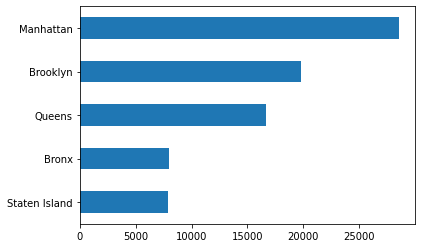

In [482]:
merged_df.borough.value_counts().sort_values().plot(kind='barh')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [483]:
popu = pd.read_csv("boro_population.csv")
merged_popu = pd.merge(merged_df, popu, on="borough")
merged_popu

,Owner_Zip_Code,Animal_Name,Animal_Gender,Primary_Breed,Secondary_Breed,Animal_Dominant_Color,Animal_Secondary_Color,Animal_Third_Color,Animal_Birth,Spayed_or_Neut,...,Vaccinated,Application_Date,License_Issued_Date,License_Expired_Date,Year,Age,neighborhood,borough,population,area_sqmi
0,10024,blue mack,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,14,Upper West Side,Manhattan,1644518,23
1,10024,louie,M,NaN,Coonhound,Black,White,Brown,2008-05-01,Yes,...,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,13,Upper West Side,Manhattan,1644518,23
2,10024,tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,10,Upper West Side,Manhattan,1644518,23
3,10024,poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,10,Upper West Side,Manhattan,1644518,23
4,10024,harlen,M,NaN,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,14,Upper West Side,Manhattan,1644518,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80854,11436,mack,M,Bullmastiff,NaN,Black,Brown,Brindle,2015-11-01,No,...,No,2016-04-15 16:36:20.033,2016-04-15,2017-04-15,2015,6,Jamaica,Queens,2339150,109
80855,11436,king,M,Yorkshire Terrier Crossbreed,NaN,Gold,NaN,NaN,2014-10-01,Yes,...,Yes,2016-04-15 19:53:46.560,2016-04-15,2017-04-15,2014,7,Jamaica,Queens,2339150,109
80856,11436,whisky,M,Shih Tzu,NaN,Brown,White,Gray,2013-09-01,Yes,...,Yes,2016-04-20 14:12:32.620,2016-04-20,2017-05-14,2013,8,Jamaica,Queens,2339150,109
80857,11436,logan,M,Labrador Retriever Crossbreed,NaN,Black,White,NaN,2014-11-01,Yes,...,Yes,2016-04-23 12:12:37.633,2016-04-23,2017-04-25,2014,7,Jamaica,Queens,2339150,109


In [484]:
# highest number of dogs per-capita
dogs_per_capita = merged_popu.borough.value_counts() / merged_popu.population.sum()
dogs_per_capita

Manhattan        1.859394e-07
Brooklyn         1.289248e-07
Queens           1.087905e-07
Bronx            5.180839e-08
Staten Island    5.141092e-08
Name: borough, dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [505]:
popular_dogs = merged_popu.groupby('borough').Primary_Breed.value_counts().groupby(level=0, group_keys=False).nlargest(5)
popular_dogs

borough        Primary_Breed                     
Bronx          Yorkshire Terrier                      753
               Shih Tzu                               682
               Chihuahua                              553
               American Pit Bull Terrier/Pit Bull     442
               Maltese                                345
Brooklyn       Yorkshire Terrier                     1316
               Shih Tzu                              1236
               Chihuahua                              987
               Labrador Retriever                     655
               Maltese                                640
Manhattan      Yorkshire Terrier                     1402
               Chihuahua                             1287
               Shih Tzu                              1227
               Labrador Retriever                    1100
               Maltese                                856
Queens         Yorkshire Terrier                     1085
               Shih Tz

<AxesSubplot:xlabel='borough,Primary_Breed'>

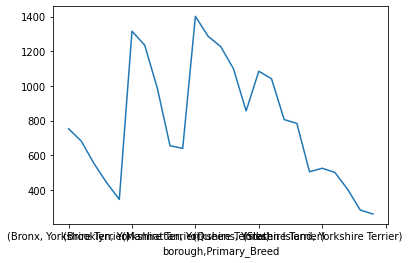

In [498]:
popular_dogs.plot(kind='line')

## What percentage of dogs are not guard dogs?

In [486]:
# I think the total figure has changed after we renamed null values as untrained dogs ('No')
# and after we converted dogs with unknown names into null values
merged_popu.Guard_or_Trained.value_counts()

No     80810
Yes       49
Name: Guard_or_Trained, dtype: int64

In [488]:
# more than 99 % aren't guard dogs
merged_popu.Guard_or_Trained.value_counts(normalize=True) * 100

No     99.939401
Yes     0.060599
Name: Guard_or_Trained, dtype: float64